# Clustering with a shopping trend data set

In [20]:
#Libraries
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist,squareform
%matplotlib inline
import matplotlib.pyplot as plt

## Read in the data set

In [21]:
df = pd.read_csv("Mall_Customers (1).csv")


In [22]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


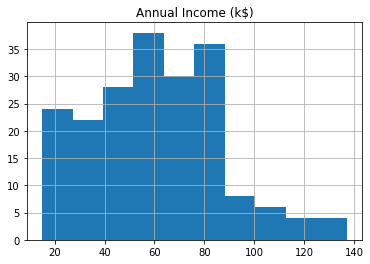

In [23]:
#Income histogram
df.hist(column='Annual Income (k$)');

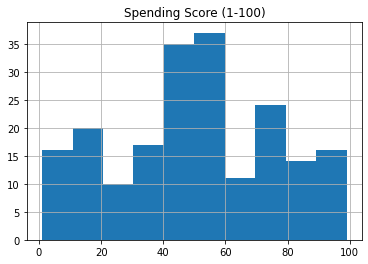

In [24]:
#pending score histogram
df.hist(column='Spending Score (1-100)');

### So, is there a definitive correlation between annual income and spending score? - *Apparently not*

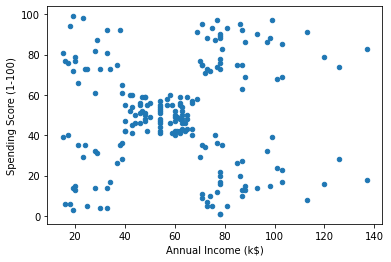

In [25]:
#pot spending score vs income
df.plot.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)')
plt.show()

### How about correlation between age and spending score? - *Apparently not*

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

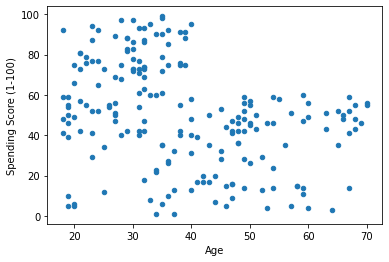

In [26]:
#plot spending score vs age
df.plot.scatter(x = 'Age', y = 'Spending Score (1-100)')

In [27]:
df.drop(['CustomerID','Age'],axis=1,inplace=True)

In [28]:
df.drop(['Gender'],axis=1,inplace=True)

In [29]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [30]:
a=np.array(df)

In [31]:
a

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Strategy
** Therefore, we will explore cluserting the customers based on their annual income and spending score to see if there are distinguisbale clusters which the mall can target **

We could use k-means but we don't have any idea about the number of hidden clusters. We will see that hierarchial clustering with dendograms will give us a good insight on the optimal number of clusters.

## Dendograms

In [32]:
X = sch.linkage(a,method="ward")

<Figure size 432x288 with 0 Axes>

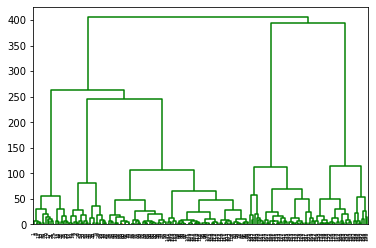

<Figure size 432x288 with 0 Axes>

In [34]:
#dendogramD
dn = sch.dendrogram(X, above_threshold_color="green", color_threshold=.7)
plt.figure()

In [35]:
print(dn.keys())
len(dn['leaves_color_list'])

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list', 'leaves_color_list'])


200

### Optimal number of clusters

Often, the optimal number of clusters can be found from a Dendogram is a simple manner.
* Look for the longest stretch of vertical line which is not crossed by any ***extended*** horizontal lines (here *extended* means horizontal lines i.e. the cluster dividers are extended infinitely to both directions).
* Now take any point on that stretch of line and draw an imaginary horizontal line.
* Count how many vertical lines this imaginary lines crossed.
* That is likely to be the optimal number of clusters.

**The idea is shown in the following figure. Here the optimal number of clusters could be 5.**

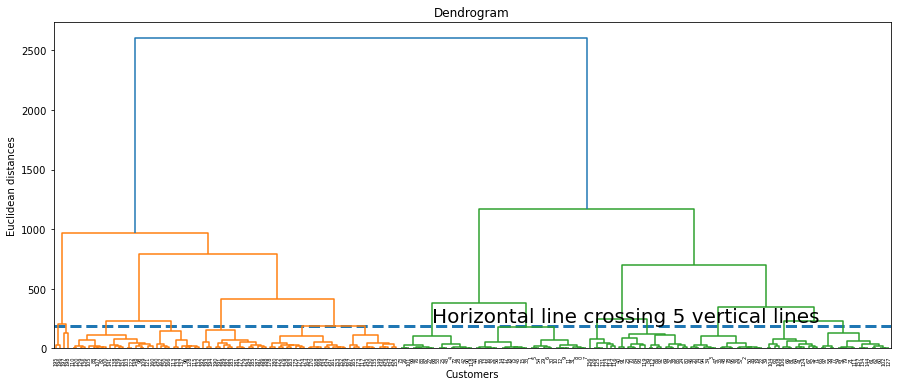

In [45]:
plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.hlines(y=190,xmin=0,xmax=2000,lw=3,linestyles='--')
plt.text(x=900,y=220,s='Horizontal line crossing 5 vertical lines',fontsize=20)
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

## Hierarchical Clustering

### Build the model

In [36]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(a)
print(y_hc)
print(y_hc.size)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]
200


### Plot the clusters and label customer types
* _Careful_ - high income but low spenders
* _Standard_ - middle income and middle spenders
* **_Target group_ - middle-to-high income and high spenders (should be targeted by the mall)**
* _Careless_ - low income but high spenders (should be avoided because of possible credit risk)
* _Sensible_ - low income and low spenders

In [38]:
print(a.shape)
print(a[0:5,0:5])
print(a[y_hc==0, 0])

(200, 2)
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]
[ 71  71  73  73  74  75  77  78  78  78  78  78  78  81  85  86  87  87
  87  88  88  93  97  98  99 101 103 103 113 120 126 137]


In [40]:
print(a[0, 0], a[0, 1])

15 39


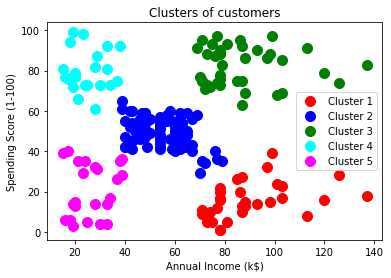

In [41]:
# Plot 
plt.scatter(a[y_hc == 0, 0], a[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(a[y_hc == 1, 0], a[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(a[y_hc == 2, 0], a[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(a[y_hc == 3, 0], a[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(a[y_hc == 4, 0], a[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Verifying the optimal number of clusters by k-means algorithm

Given a set of observations $(x_1, x_2, …, x_n)$, where each observation is a d-dimensional real vector, [**k-means clustering**](https://en.wikipedia.org/wiki/K-means_clustering) aims to partition the *$n$* observations into *$k$* (≤ *$n$*) sets $S = {S_1, S_2, …, S_k}$ so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance). Formally, the objective is to find:

$${\displaystyle {\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}\sum _{\mathbf {x} \in S_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}={\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}|S_{i}|\operatorname {Var} S_{i}}$$

where $\mu_i$ is the mean of points in $S_i$

We run k-means++ model (k-means with carefully initialized centroids) iterating over number of clusters (1 to 15) and plot the ***within-cluster-sum-of-squares (WCSS) matric*** to determine the optimum number of cluster by elbow method

In [43]:
from sklearn.cluster import KMeans

C:\Users\poojitha kollapudi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


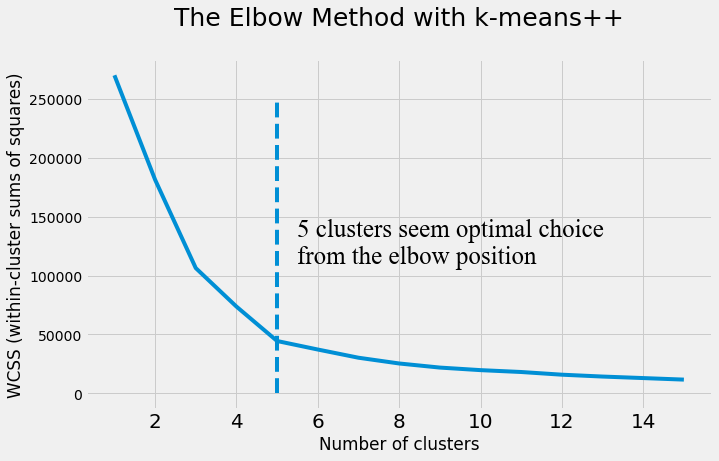

In [44]:
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(a)
    wcss.append(kmeans.inertia_)

with plt.style.context(('fivethirtyeight')):
    plt.figure(figsize=(10,6))
    plt.plot(range(1, 16), wcss)
    plt.title('The Elbow Method with k-means++\n',fontsize=25)
    plt.xlabel('Number of clusters')
    plt.xticks(fontsize=20)
    plt.ylabel('WCSS (within-cluster sums of squares)')
    plt.vlines(x=5,ymin=0,ymax=250000,linestyles='--')
    plt.text(x=5.5,y=110000,s='5 clusters seem optimal choice \nfrom the elbow position',
             fontsize=25,fontdict={'family':'Times New Roman'})
    plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html